<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(1_6)_n250_01_ipynb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.756990,69.358821,75.223785,-29.449063,198.890534,230.170343,-31.279810
1,0.0,1.0,65.334359,27.770059,67.842332,19.843897,190.790646,168.701681,22.088965
2,0.0,2.0,89.582632,74.508347,31.234771,15.349045,220.674795,204.631396,16.043399
3,0.0,3.0,50.926867,20.096008,84.581953,3.829905,169.434733,164.744669,4.690064
4,0.0,4.0,28.461799,34.448529,59.436009,2.396207,134.742544,135.604717,-0.862173
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.474665,61.637729,97.171628,13.726775,259.010797,245.450032,13.560765
249996,999.0,246.0,95.340605,34.612337,42.378151,-19.204240,163.126853,187.054810,-23.927956
249997,999.0,247.0,84.983241,33.136054,27.934271,-32.512369,123.541198,160.437426,-36.896228
249998,999.0,248.0,59.214164,69.355966,97.294228,-38.276345,197.588013,234.298110,-36.710096


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.756990,69.358821,75.223785,-29.449063,198.890534,230.170343,-31.279810
1,0.0,1.0,65.334359,27.770059,67.842332,19.843897,190.790646,168.701681,22.088965
2,0.0,2.0,89.582632,74.508347,31.234771,15.349045,220.674795,204.631396,16.043399
3,0.0,3.0,50.926867,20.096008,84.581953,3.829905,169.434733,164.744669,4.690064
4,0.0,4.0,28.461799,34.448529,59.436009,2.396207,134.742544,135.604717,-0.862173
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.474665,61.637729,97.171628,13.726775,259.010797,245.450032,13.560765
249996,999.0,246.0,95.340605,34.612337,42.378151,-19.204240,163.126853,187.054810,-23.927956
249997,999.0,247.0,84.983241,33.136054,27.934271,-32.512369,123.541198,160.437426,-36.896228
249998,999.0,248.0,59.214164,69.355966,97.294228,-38.276345,197.588013,234.298110,-36.710096


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.756990  69.358821  75.223785  ...  198.890534  230.170343 -31.279810
      1.0    65.334359  27.770059  67.842332  ...  190.790646  168.701681  22.088965
      2.0    89.582632  74.508347  31.234771  ...  220.674795  204.631396  16.043399
      3.0    50.926867  20.096008  84.581953  ...  169.434733  164.744669   4.690064
      4.0    28.461799  34.448529  59.436009  ...  134.742544  135.604717  -0.862173
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  76.474665  61.637729  97.171628  ...  259.010797  245.450032  13.560765
      246.0  95.340605  34.612337  42.378151  ...  163.126853  187.054810 -23.927956
      247.0  84.983241  33.136054  27.934271  ...  123.541198  160.437426 -36.896228
      248.0  59.214164  69.355966  97.294228  ...  197.588013  234.298110 -36.710096
      249.0  75.678303  61.306817  42.302740  ...  184.675865  192.172170  -7.496305

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.756990  69.358821  75.223785  ...  198.890534  230.170343 -31.279810
      1.0    65.334359  27.770059  67.842332  ...  190.790646  168.701681  22.088965
      2.0    89.582632  74.508347  31.234771  ...  220.674795  204.631396  16.043399
      3.0    50.926867  20.096008  84.581953  ...  169.434733  164.744669   4.690064
      4.0    28.461799  34.448529  59.436009  ...  134.742544  135.604717  -0.862173
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  76.474665  61.637729  97.171628  ...  259.010797  245.450032  13.560765
      246.0  95.340605  34.612337  42.378151  ...  163.126853  187.054810 -23.927956
      247.0  84.983241  33.136054  27.934271  ...  123.541198  160.437426 -36.896228
      248.0  59.214164  69.355966  97.294228  ...  197.588013  234.298110 -36.710096
      249.0  75.678303  61.306817  42.302740  ...  184.675865  192.172170  -7.496305

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.756990,69.358821,75.223785,-29.449063,198.890534,230.170343,-31.279810
1,0.0,1.0,65.334359,27.770059,67.842332,19.843897,190.790646,168.701681,22.088965
2,0.0,2.0,89.582632,74.508347,31.234771,15.349045,220.674795,204.631396,16.043399
3,0.0,3.0,50.926867,20.096008,84.581953,3.829905,169.434733,164.744669,4.690064
4,0.0,4.0,28.461799,34.448529,59.436009,2.396207,134.742544,135.604717,-0.862173
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.474665,61.637729,97.171628,13.726775,259.010797,245.450032,13.560765
249996,999.0,246.0,95.340605,34.612337,42.378151,-19.204240,163.126853,187.054810,-23.927956
249997,999.0,247.0,84.983241,33.136054,27.934271,-32.512369,123.541198,160.437426,-36.896228
249998,999.0,248.0,59.214164,69.355966,97.294228,-38.276345,197.588013,234.298110,-36.710096


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.756990  69.358821  75.223785  ...  198.890534  230.170343 -31.279810
      1.0    65.334359  27.770059  67.842332  ...  190.790646  168.701681  22.088965
      2.0    89.582632  74.508347  31.234771  ...  220.674795  204.631396  16.043399
      3.0    50.926867  20.096008  84.581953  ...  169.434733  164.744669   4.690064
      4.0    28.461799  34.448529  59.436009  ...  134.742544  135.604717  -0.862173
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  76.474665  61.637729  97.171628  ...  259.010797  245.450032  13.560765
      246.0  95.340605  34.612337  42.378151  ...  163.126853  187.054810 -23.927956
      247.0  84.983241  33.136054  27.934271  ...  123.541198  160.437426 -36.896228
      248.0  59.214164  69.355966  97.294228  ...  197.588013  234.298110 -36.710096
      249.0  75.678303  61.306817  42.302740  ...  184.675865  192.172170  -7.496305

[250000 rows x 7 columns]

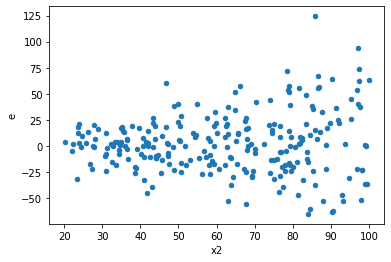

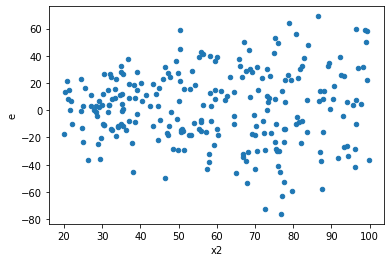

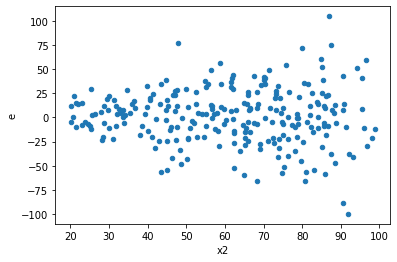

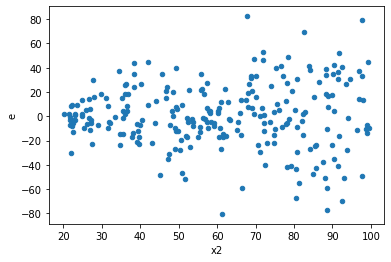

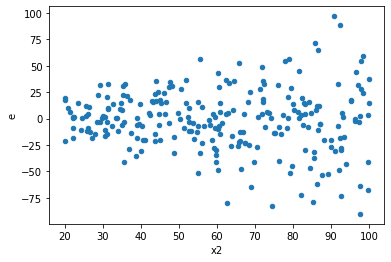

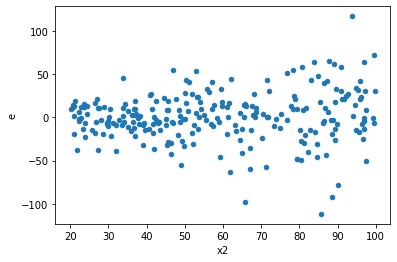

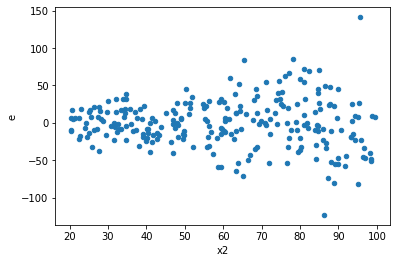

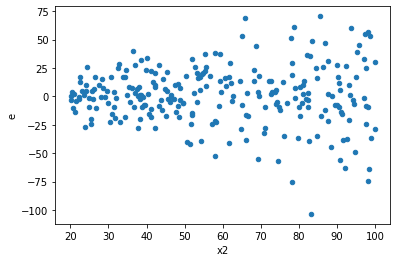

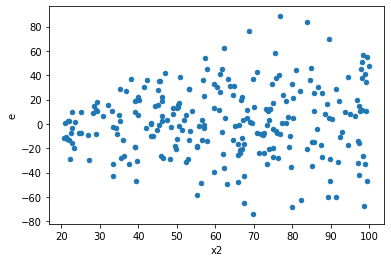

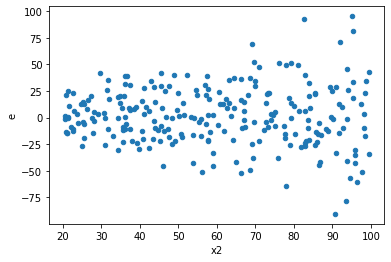

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,29886.32643771585,134901.44721631907,308.10645812078195,1390.7365692404028,4.5138183007355694,1.3222756223285614e-12,0.9999999999993389,6.611378111642807e-13,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,36625.88035046381,101374.33259398091,377.58639536560634,1045.0962123090817,2.7678333359896197,9.649801560041027e-07,0.999999517509922,4.824900780020513e-07,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,48006.579197327635,122494.09306868677,494.9131876013158,1262.8257017390388,2.551610531656161,6.155513863737028e-06,0.9999969222430681,3.077756931868514e-06,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,35332.02839085341,106810.33914459817,364.24771536962277,1101.1375169546202,3.023045774871185,1.1311017567017245e-07,0.9999999434449122,5.6555087835086226e-08,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,29505.07109539339,138620.5106048664,304.17599067415864,1429.0774289161484,4.69819273292682,3.7281289166912757e-13,0.9999999999998136,1.8640644583456378e-13,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,29766.421377247472,134434.4246314453,306.8703234767781,1385.9219034169619,4.516311280005019,1.2996270726262082e-12,0.9999999999993502,6.498135363131041e-13,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,33460.13538658452,158732.9894988574,344.9498493462322,1636.422572153169,4.743943431935414,2.7333690866271354e-13,0.9999999999998633,1.3666845433135677e-13,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,20166.971637377905,107280.5781371763,207.90692409667943,1105.9853416203741,5.3196176434512426,6.439293542825908e-15,0.9999999999999968,3.219646771412954e-15,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,41145.88993645642,108526.93222552356,424.18443233460226,1118.8343528404491,2.637612952183728,2.9352967496620863e-06,0.9999985323516252,1.4676483748310432e-06,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,29886.32643771585,134901.44721631907,308.10645812078195,1390.7365692404028,4.5138183007355694,1.3222756223285614e-12,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,36625.88035046381,101374.33259398091,377.58639536560634,1045.0962123090817,2.7678333359896197,9.649801560041027e-07,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,48006.579197327635,122494.09306868677,494.9131876013158,1262.8257017390388,2.551610531656161,6.155513863737028e-06,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,35332.02839085341,106810.33914459817,364.24771536962277,1101.1375169546202,3.023045774871185,1.1311017567017245e-07,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,29505.07109539339,138620.5106048664,304.17599067415864,1429.0774289161484,4.69819273292682,3.7281289166912757e-13,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,29766.421377247472,134434.4246314453,306.8703234767781,1385.9219034169619,4.516311280005019,1.2996270726262082e-12,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,33460.13538658452,158732.9894988574,344.9498493462322,1636.422572153169,4.743943431935414,2.7333690866271354e-13,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,20166.971637377905,107280.5781371763,207.90692409667943,1105.9853416203741,5.3196176434512426,6.439293542825908e-15,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,41145.88993645642,108526.93222552356,424.18443233460226,1118.8343528404491,2.637612952183728,2.9352967496620863e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64